# Week 11 Seminar Answers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os

C:\Users\yueya\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Question 1

In [2]:
def newton_vol_put(S, K, T, P, r):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #P: Put value
    #r: risk free rate
    #sigma: volatility of underlying asset
   
    MAX_ITERATIONS = 100
    tolerance = 0.00000001
    
    sigma = 0.25
    
    for i in range(0, MAX_ITERATIONS):
        d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        price = K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)-S * si.norm.cdf(-d1, 0.0, 1.0)
        vega = S * np.sqrt(T) * si.norm.pdf(d1, 0.0, 1.0)

        diff = P - price

        if (abs(diff) < tolerance):
            return sigma
        else: 
            sigma = sigma + diff/vega
        
        print(i,sigma,diff)
        
    return sigma

## Question 2

In [3]:
impvol = newton_vol_put(230.38, 200, 1/12, 10, 0.0353)
print('The implied volatility is', round(impvol*100,2) , '% for the one-month put with strike $ 200' ) 

0 3.207476639702809 9.868810955849773
1 0.8333111662445285 -52.012721371926496
2 0.8986902806376027 1.338197559041383
3 0.897884857392595 -0.016887158128341184
4 0.8978847515993946 -2.2175633773713344e-06
The implied volatility is 89.79 % for the one-month put with strike $ 200


## Question 3

In [4]:
AAPL = yf.Ticker("AAPL")
opt = AAPL.option_chain('2024-12-06')
opt.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL241206P00100000,2024-11-21 18:54:43+00:00,100.0,0.01,0.00,0.03,0.000000,0.000000,1.0,4,1.531252,False,REGULAR,USD
1,AAPL241206P00105000,2024-11-19 14:56:52+00:00,105.0,0.01,0.00,0.12,0.000000,0.000000,28.0,41,1.644533,False,REGULAR,USD
2,AAPL241206P00110000,2024-11-18 19:53:59+00:00,110.0,0.01,0.00,0.12,0.000000,0.000000,1227.0,1276,1.554690,False,REGULAR,USD
3,AAPL241206P00120000,2024-11-19 20:43:04+00:00,120.0,0.01,0.00,0.13,0.000000,0.000000,460.0,475,1.394534,False,REGULAR,USD
4,AAPL241206P00125000,2024-11-19 19:36:29+00:00,125.0,0.01,0.00,0.03,0.000000,0.000000,70.0,387,1.140629,False,REGULAR,USD
5,AAPL241206P00130000,2024-11-18 19:07:32+00:00,130.0,0.01,0.00,0.06,0.000000,0.000000,3.0,6,1.140629,False,REGULAR,USD
6,AAPL241206P00135000,2024-11-18 19:07:43+00:00,135.0,0.01,0.00,0.13,0.000000,0.000000,5.0,55,1.160160,False,REGULAR,USD
7,AAPL241206P00140000,2024-11-21 14:30:00+00:00,140.0,0.01,0.00,0.01,0.000000,0.000000,2.0,3,0.843752,False,REGULAR,USD
8,AAPL241206P00145000,2024-11-25 18:32:20+00:00,145.0,0.01,0.00,0.01,-0.010000,-50.000000,104.0,84,0.796877,False,REGULAR,USD
9,AAPL241206P00150000,2024-11-19 17:28:30+00:00,150.0,0.02,0.00,0.03,0.000000,0.000000,97.0,104,0.820314,False,REGULAR,USD


In [5]:
import mibian

In [6]:
impliedvol = np.zeros((len(opt.puts.strike),1))
for i in range(len(opt.puts.strike)):
    p = mibian.BS([230.38, opt.puts.strike[i], 3.53, 28], putPrice = opt.puts.lastPrice[i])
    impliedvol[i] = p.impliedVolatility

Text(0.5, 1.0, 'Volatility Smile/Skew')

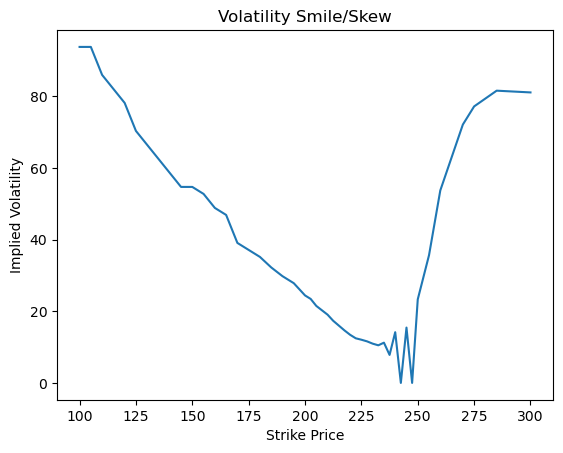

In [7]:
fig = plt.figure()
plt.plot(opt.puts.strike, impliedvol, '-')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Volatility Smile/Skew')

## Quetion 4

Text(0.5, 1.0, 'Volatility Smile/Skew')

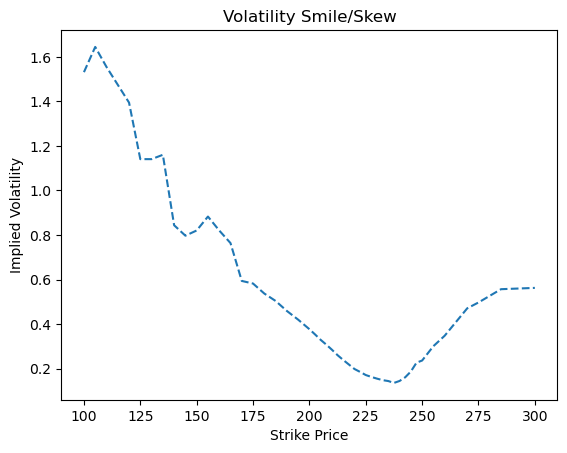

In [8]:
fig = plt.figure()
plt.plot(opt.puts.strike, opt.puts.impliedVolatility, '--')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Volatility Smile/Skew')

## Question 5

In [9]:
difference = np.zeros((len(opt.puts.strike),1))
for i in range(len(opt.puts.strike)):
    difference[i] = impliedvol[i] - opt.puts.impliedVolatility[i]*100

Text(0.5, 1.0, 'Volatility Smile/Skew')

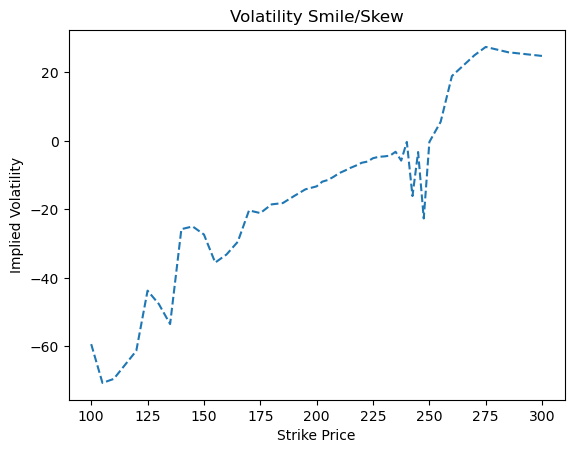

In [10]:
fig = plt.figure()
plt.plot(opt.puts.strike, difference, '--')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Volatility Smile/Skew')

## Question 6

In [11]:
import arrow
T =['2024-11-29', '2024-12-06', '2024-12-13', '2024-12-20', '2024-12-27', '2025-01-03', '2025-01-17', '2025-02-21', '2025-03-21', '2025-04-17', '2025-05-16', '2025-06-20', '2025-08-15', '2025-09-19', '2025-12-19', '2026-01-16', '2026-06-18', '2026-12-18', '2027-01-15']


In [36]:
K = np.linspace(160.00,200.00,3)
now = arrow.get('2024-12-06')
days = np.zeros((len(T),1))
impliedvol_s = np.zeros((len(K),len(days)))
for j in range(len(days)):
    for i in range(len(K)):
        opt = AAPL.option_chain(T[j])
        temp = arrow.get(T[j])
        delta = temp - now
        days[j] = delta.days
        impliedvol_s [i,j] = opt.puts.impliedVolatility[opt.puts.strike == K[i]].values[0]
        

IndexError: index 0 is out of bounds for axis 0 with size 0

In [38]:
i=0
j=0
opt.puts.impliedVolatility[opt.puts.strike == K[i]].values[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

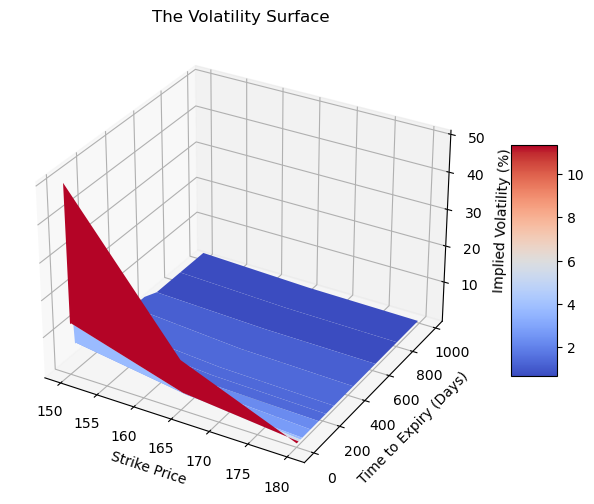

In [13]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
K, days = np.meshgrid(K, days)
surf = ax.plot_surface(K, days, impliedvol_s.T*100, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Strike Price')
ax.set_ylabel('Time to Expiry (Days)')
ax.set_zlabel('Implied Volatility (%)')
plt.title('The Volatility Surface')
fig.colorbar(surf, shrink=0.5, aspect=5);